In [6]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as sts

In [30]:
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_t = nx.read_gml(data_base_path + "graph_terrorists.gml")
G_t_rnd = nx.read_gml(data_rnd_base_path + "graph_terrorists_random.gml")

## thread unsafe
figure_uni_index=0
def new_figure():
    global figure_uni_index
    figure_uni_index = figure_uni_index + 1
    plt.figure(figure_uni_index)

In [16]:
def centrality(G):
    d_c = nx.degree_centrality(G)
    c_c = nx.closeness_centrality(G)
    b_c = nx.betweenness_centrality(G)
    e_c = nx.eigenvector_centrality(G)
    
    node = G.nodes()
    
    degree_c = [d_c[n] for n in node]
    closeness_c = [c_c[n] for n in node]
    betweenness_c = [b_c[n] for n in node]
    eigenvector_c = [e_c[n] for n in node]
    
    return degree_c, closeness_c, betweenness_c, eigenvector_c

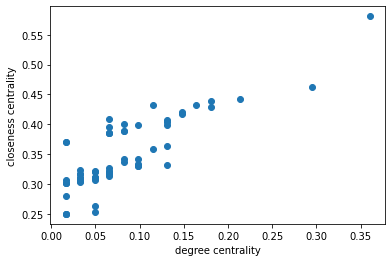

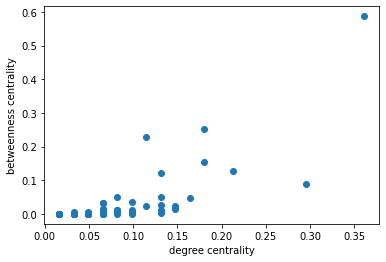

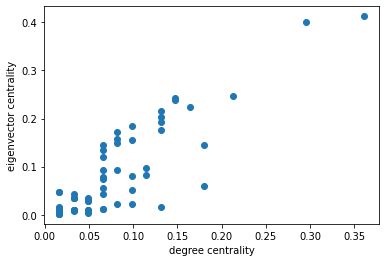

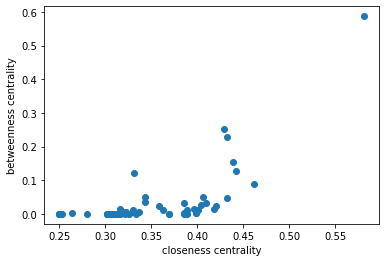

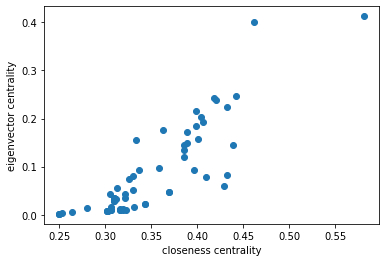

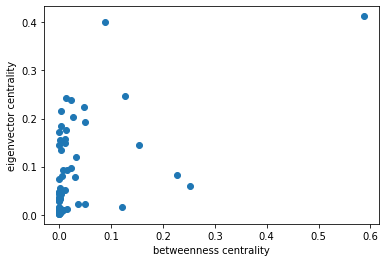

In [31]:
def scatter_centrality(G):
    degree_c,closeness_c,betweenness_c,eigenvector_c = centrality(G)
    c_array = np.array([degree_c, closeness_c, betweenness_c, eigenvector_c])
    label = ["degree centrality", "closeness centrality", "betweenness centrality", "eigenvector centrality"]
#   plot with conbination of C(6, 2)
    x=0
    y=x+1
    while(x<len(c_array)):
        while(y<len(c_array)):
            new_figure()
            plt.xlabel(label[x])
            plt.ylabel(label[y])
            plt.scatter(c_array[x],c_array[y])
            y=y+1
        x=x+1
        y=x+1

In [ ]:
def graph_spearman_corelation(G):
#     get adjacency matrix
#     
    X=[]
    Y=[]
    sts.spearmanr(X, Y)
    sts.pearsonr(X, Y)

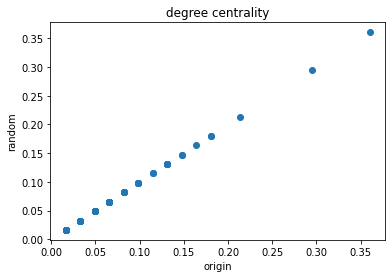

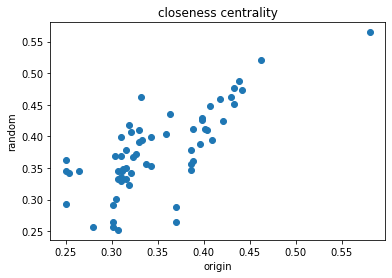

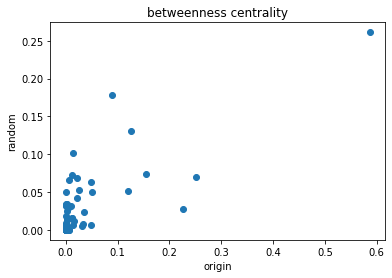

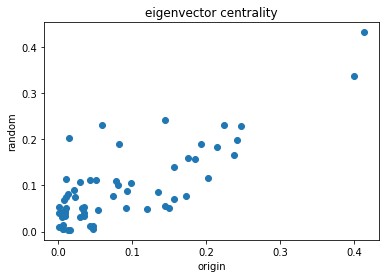

In [35]:
def compare_origal_random_centrality(G, G_rnd, g_label="origin", r_rnd_label="random"):
    degree_c,closeness_c,betweenness_c,eigenvector_c = centrality(G)
    rnd_degree_c,rnd_closeness_c,rnd_betweenness_c,rnd_eigenvector_c = centrality(G_rnd)
    c_array = np.array([degree_c, closeness_c, betweenness_c, eigenvector_c])
    rnd_c_array  = np.array([rnd_degree_c,rnd_closeness_c,rnd_betweenness_c,rnd_eigenvector_c])
    
    title = ["degree centrality", "closeness centrality", "betweenness centrality", "eigenvector centrality"]
    for i in range(0, len(c_array)):
        new_figure()
        plt.title(title[i])
        plt.xlabel(g_label)
        plt.ylabel(r_rnd_label)
        plt.scatter(c_array[i], rnd_c_array[i])